<a href="https://colab.research.google.com/github/vipingupta1907/2011MT22_CS575/blob/main/end_sem_cs575/A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CS575 End Sem Examination

###**Question 1** - Consider a time series stock values of various companies for a given duration (download using the script below). Perform an exploratory data analysis. (submit your code and analysis)

**Name**- Vipin Gupta

**Roll**- 2011MT22 

#Downloading & Exporting the dataset

In [131]:
from pandas_datareader import data as pdr
from datetime import datetime

In [132]:
#download data
ibm = pdr.DataReader('IBM', 'yahoo', start=datetime(2014, 8, 1), end=datetime(2016, 11, 30))
apple = pdr.DataReader('AAPL', 'yahoo', start=datetime(2014, 8, 1), end=datetime(2016, 11, 30))
fb = pdr.DataReader('FB', 'yahoo', start=datetime(2014, 8, 1), end=datetime(2016, 11, 30))
google = pdr.DataReader('GOOGL', 'yahoo', start=datetime(2014, 8, 1), end=datetime(2016, 11, 30))

In [133]:
#print first few lines of data
print(ibm.head())
print(apple.head())
print(fb.head())
print(google.head())

                  High         Low  ...     Volume   Adj Close
Date                                ...                       
2014-08-01  191.500000  188.860001  ...  5181100.0  143.561371
2014-08-04  189.949997  188.600006  ...  2125900.0  143.933304
2014-08-05  189.199997  186.440002  ...  3307900.0  142.005493
2014-08-06  186.880005  184.440002  ...  3847000.0  141.982544
2014-08-07  186.679993  183.580002  ...  2708600.0  140.707535

[5 rows x 6 columns]
                 High        Low       Open      Close       Volume  Adj Close
Date                                                                          
2014-08-01  24.155001  23.702499  23.725000  24.032499  194044000.0  21.657644
2014-08-04  24.145000  23.792500  24.092501  23.897499  159832000.0  21.535982
2014-08-05  23.920000  23.590000  23.840000  23.780001  223732000.0  21.430096
2014-08-06  23.870001  23.677500  23.687500  23.740000  154232000.0  21.394049
2014-08-07  23.987499  23.525000  23.732500  23.620001  1868440

In [134]:
#export and save as csv files
ibm.to_csv('IBM_stock.csv', sep=',')
apple.to_csv('Apple_stock.csv', sep=',')
fb.to_csv('Facebook_stock.csv', sep=',')
google.to_csv('Google_stock.csv', sep=',')

#Exploratory data analysis for Apple dataset

In [135]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller,kpss

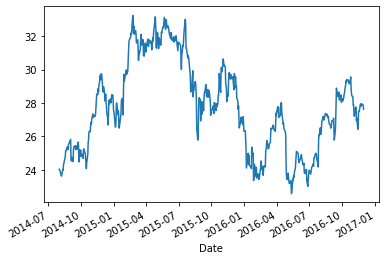

In [136]:
#Visulaizing the close data
import matplotlib.pyplot as plt
apple["Close"].plot()

In [137]:
#ADF Test

def adf_test(atr):

    #Perform Dickey-Fuller test:
    timeseries = apple[atr].dropna()
    print ('Results of Dickey-Fuller Test for ',atr,'\n')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

#apply adf test on the series
adf_test('Close')

Results of Dickey-Fuller Test for  Close 

Test Statistic                  -2.170605
p-value                          0.217087
#Lags Used                       0.000000
Number of Observations Used    588.000000
Critical Value (1%)             -3.441520
Critical Value (5%)             -2.866468
Critical Value (10%)            -2.569394
dtype: float64


The p value obtained is greater than significance level of 0.05  and test statistic is higher than any of the critical values 

so we cant reject the null hypothesis so the time series is non stationary.

In [138]:
#KPSS Test

def kpss_test(atr):
    timeseries = apple[atr].dropna()
    print ('Results of KPSS Test for ',atr)
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

kpss_test('Close')

Results of KPSS Test for  Close
Test Statistic            0.655743
p-value                   0.017569
Lags Used                19.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


The p value is significant less than 0.05 hence we can reject the null hypothesis so series is non stationary

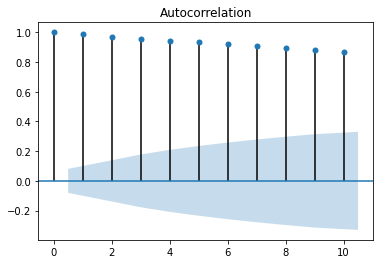

In [139]:
# ACF Test of differenced data
plot_acf(apple['Close'].dropna(), lags=10)
plt.show()


As more than 5% of the plot is outside the shaded region, the data is non stationary

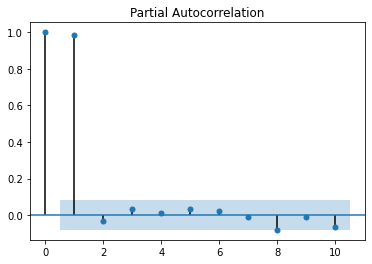

In [140]:
# PACF Test of differenced data
plot_pacf(apple['Close'].dropna(), lags=10)
plt.show()

As more than 5% of the plot is outside the shaded region, the data is non stationary

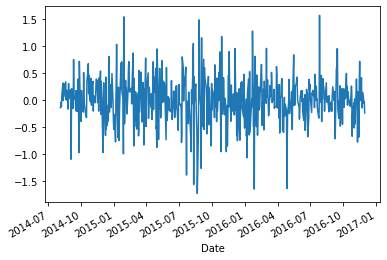

In [141]:
#Differencing to make data as stationary

#Differencing the data
apple['diff'] = apple['Close'].diff(periods=1)

#Visulaizing the differenced data
apple["diff"].plot()


In [142]:
# ADF Test of differenced data
adf_test('diff')


Results of Dickey-Fuller Test for  diff 

Test Statistic                 -23.776321
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    587.000000
Critical Value (1%)             -3.441539
Critical Value (5%)             -2.866476
Critical Value (10%)            -2.569399
dtype: float64


In [143]:
# KPSS Test of differenced data
kpss_test('diff')


Results of KPSS Test for  diff
Test Statistic            0.130863
p-value                   0.100000
Lags Used                19.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


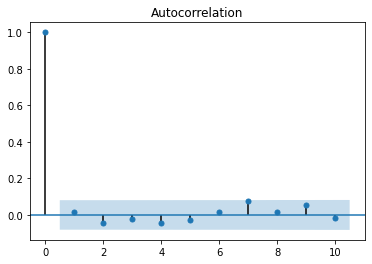

In [144]:
# ACF Test of differenced data
plot_acf(apple['diff'].dropna(), lags=10)
plt.show()


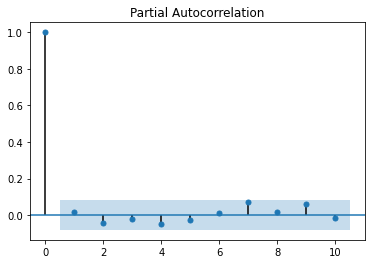

In [145]:
# PACF Test of differenced data
plot_pacf(apple['diff'].dropna(), lags=10)
plt.show()

Now the time series become stationary after differencing

**Outliers**

In [146]:
apple.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
diff         1
dtype: int64

In [147]:
apple.describe()

,High,Low,Open,Close,Volume,Adj Close,diff
count,589.000000,589.000000,589.000000,589.000000,5.890000e+02,589.000000,588.000000
mean,27.992016,27.478374,27.743353,27.738748,1.891853e+08,25.586068,0.006118
std,2.712822,2.695806,2.718831,2.700132,8.425158e+07,2.418740,0.427976
min,22.917500,22.367500,22.500000,22.584999,4.590360e+07,21.134403,-1.722500
25%,25.547501,25.125000,25.327499,25.330000,1.311576e+08,23.305397,-0.205000
50%,27.969999,27.352501,27.657499,27.610001,1.733648e+08,25.591351,0.002501
75%,29.807501,29.250000,29.497499,29.570000,2.243016e+08,27.354954,0.255000
max,33.634998,32.849998,33.615002,33.250000,7.593852e+08,30.384638,1.570000


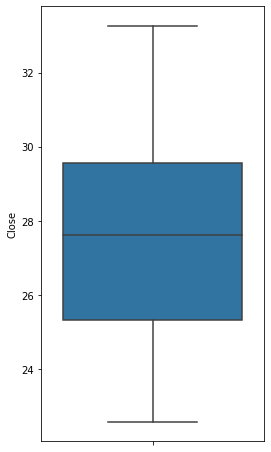

In [148]:
import seaborn as sns 
plt.figure(figsize = (4,8))
sns.boxplot(y = apple.Close)

**Interquartile Range (IQR) method for detecting outliers**

In [149]:
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [150]:
import numpy as np
out_iqr(apple,'Close')
#Input the dataset and the required column

The IQR is 4.239999771118164
The lower bound value is 18.97000026702881
The upper bound value is 35.929999351501465
Total number of outliers are 0


As per the IQR method, there are 0 outliers.

**Standard Deviation Method for detecting outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


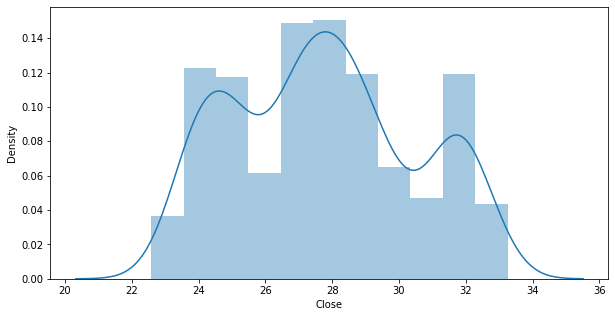

In [151]:
plt.figure(figsize = (10,5))
sns.distplot(apple['Close'])

In [152]:
def out_std(df, column):
    global lower,upper
    # calculate the mean and standard deviation of the data frame
    data_mean, data_std = df[column].mean(), df[column].std()
    # calculate the cutoff value
    cut_off = data_std * 3
    # calculate the lower and upper bound value
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [153]:
out_std(apple,'Close')

The lower bound value is 19.63835210617126
The upper bound value is 35.8391436151503
Total number of outliers are 0


As per the standard deviation method, there are 0 outliers.

Visual representation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


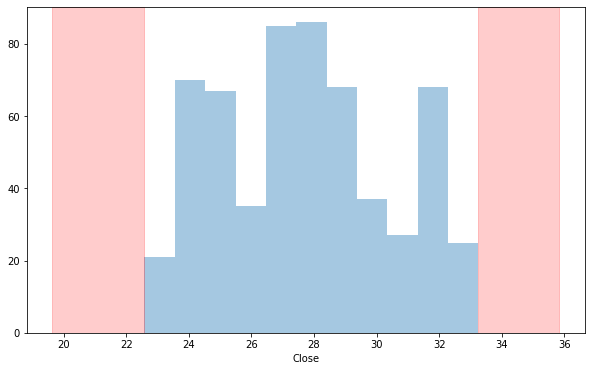

In [154]:
plt.figure(figsize = (10,6))
sns.distplot(apple.Close, kde=False)
plt.axvspan(xmin = lower,xmax= apple.Close.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= apple.Close.max(),alpha=0.2, color='red')

#Exploratory data analysis for Facebook dataset

In [156]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller,kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


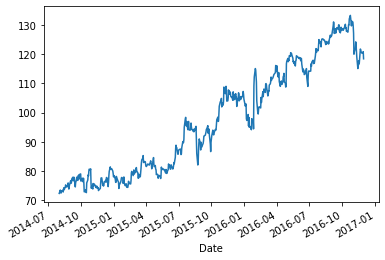

In [157]:
#Visulaizing the close data
import matplotlib.pyplot as plt
fb["Close"].plot()

In [158]:
#ADF Test

def adf_test(atr):
  
    #Perform Dickey-Fuller test:
    timeseries = fb[atr].dropna()
    print ('Results of Dickey-Fuller Test for ',atr,'\n')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

#apply adf test on the series
adf_test('Close')

Results of Dickey-Fuller Test for  Close 

Test Statistic                  -0.966644
p-value                          0.765235
#Lags Used                       6.000000
Number of Observations Used    582.000000
Critical Value (1%)             -3.441636
Critical Value (5%)             -2.866519
Critical Value (10%)            -2.569422
dtype: float64


The p value obtained is greater than significance level of 0.05 and test statistic is higher than any of the critical values

so we cant reject the null hypothesis so the time series is non stationary.

In [159]:
#KPSS Test

def kpss_test(atr):
    timeseries = fb[atr].dropna()
    print ('Results of KPSS Test for ',atr)
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
    
kpss_test('Close')

Results of KPSS Test for  Close
Test Statistic            2.941636
p-value                   0.010000
Lags Used                19.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


The p value is significant less than 0.05 hence we can reject the null hypothesis so series is non stationary

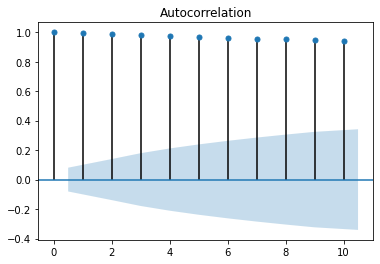

In [160]:
# ACF Test of differenced data
plot_acf(fb['Close'].dropna(), lags=10)
plt.show()


As more than 5% of the plot is outside the shaded region, the data is non stationary.

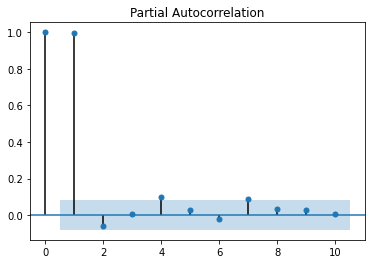

In [161]:
# PACF Test of differenced data
plot_pacf(fb['Close'].dropna(), lags=10)
plt.show()

As more than 5% of the plot is outside the shaded region, the data is non stationary.

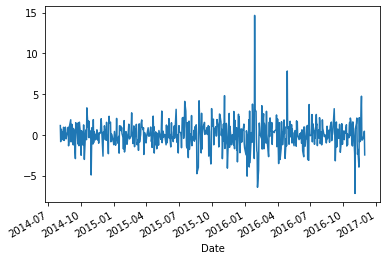

In [162]:
#Differencing to make data as stationary

#Differencing the data
fb['diff'] = fb['Close'].diff(periods=1)

#Visulaizing the differenced data
fb["diff"].plot()


In [163]:
# ADF Test of differenced data
adf_test('diff')


Results of Dickey-Fuller Test for  diff 

Test Statistic                -1.191784e+01
p-value                        5.114835e-22
#Lags Used                     5.000000e+00
Number of Observations Used    5.820000e+02
Critical Value (1%)           -3.441636e+00
Critical Value (5%)           -2.866519e+00
Critical Value (10%)          -2.569422e+00
dtype: float64


In [164]:
# KPSS Test of differenced data
kpss_test('diff')


Results of KPSS Test for  diff
Test Statistic            0.058162
p-value                   0.100000
Lags Used                19.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


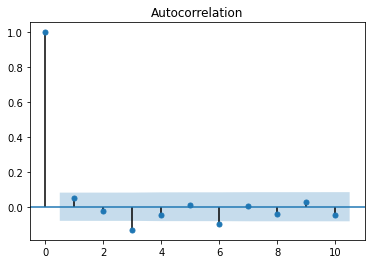

In [165]:
# ACF Test of differenced data
plot_acf(fb['diff'].dropna(), lags=10)
plt.show()


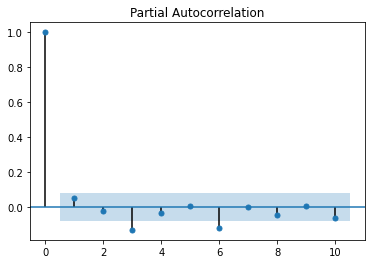

In [166]:
# PACF Test of differenced data
plot_pacf(fb['diff'].dropna(), lags=10)
plt.show()

Now the given time series become stationry after differencing

**Outliers**

In [167]:
fb.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
diff         1
dtype: int64

In [168]:
fb.describe()

,High,Low,Open,Close,Volume,Adj Close,diff
count,589.000000,589.000000,589.000000,589.000000,5.890000e+02,589.000000,588.000000
mean,98.479779,96.491545,97.527742,97.544160,2.754758e+07,97.544160,0.078333
std,18.576699,18.438006,18.550756,18.511200,1.396508e+07,18.511200,1.642251
min,73.220001,70.320000,70.790001,72.360001,5.913100e+06,72.360001,-7.169998
25%,80.000000,78.519997,79.300003,79.330002,1.889710e+07,79.330002,-0.784998
50%,96.099998,93.629997,94.949997,94.970001,2.400390e+07,94.970001,0.110001
75%,115.010002,113.070000,114.070000,114.190002,3.196100e+07,114.190002,0.982502
max,133.500000,132.220001,133.500000,133.279999,1.074753e+08,133.279999,14.660004


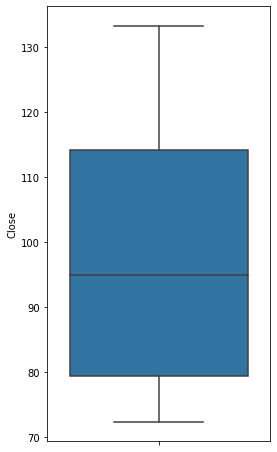

In [169]:
import seaborn as sns 
plt.figure(figsize = (4,8))
sns.boxplot(y = fb.Close)

**Interquartile Range (IQR) method for detecting outliers**

In [170]:
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [171]:
import numpy as np
out_iqr(fb,'Close')
#Input the dataset and the required column

The IQR is 34.86000061035156
The lower bound value is 27.040000915527344
The upper bound value is 166.4800033569336
Total number of outliers are 0


As per the IQR method, there are 0 outliers.

**Standard Deviation Method for detecting outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


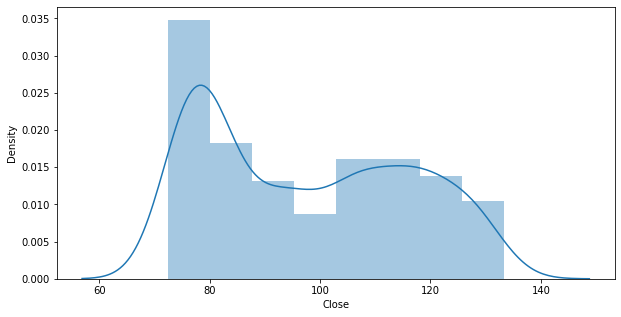

In [172]:
plt.figure(figsize = (10,5))
sns.distplot(fb['Close'])

In [173]:
def out_std(df, column):
    global lower,upper
    # calculate the mean and standard deviation of the data frame
    data_mean, data_std = df[column].mean(), df[column].std()
    # calculate the cutoff value
    cut_off = data_std * 3
    # calculate the lower and upper bound value
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [174]:
out_std(fb,'Close')

The lower bound value is 42.010559141214934
The upper bound value is 153.07776018062955
Total number of outliers are 0


As per the standard deviation method, there are 0 outliers.

Visual representation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


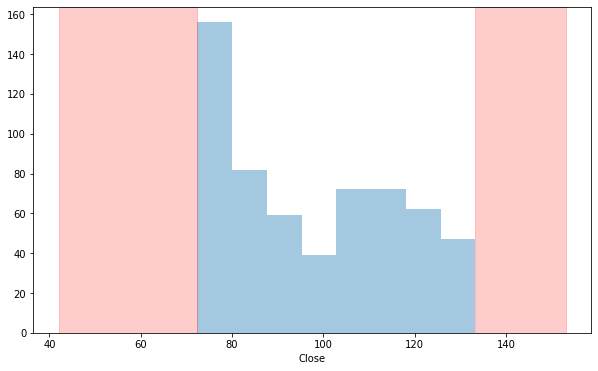

In [175]:
plt.figure(figsize = (10,6))
sns.distplot(fb.Close, kde=False)
plt.axvspan(xmin = lower,xmax= fb.Close.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= fb.Close.max(),alpha=0.2, color='red')

#Exploratory data analysis for Google dataset

In [177]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller,kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


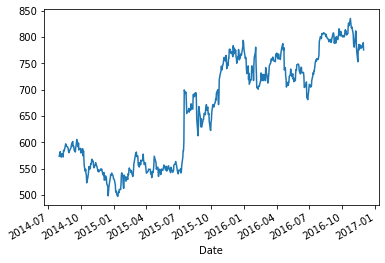

In [178]:
#Visulaizing the close data
import matplotlib.pyplot as plt
google["Close"].plot()

In [179]:
#ADF Test

def adf_test(atr):
  
    #Perform Dickey-Fuller test:
    timeseries = google[atr].dropna()
    print ('Results of Dickey-Fuller Test for ',atr,'\n')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

#apply adf test on the series
adf_test('Close')

Results of Dickey-Fuller Test for  Close 

Test Statistic                  -1.092577
p-value                          0.718023
#Lags Used                       3.000000
Number of Observations Used    585.000000
Critical Value (1%)             -3.441578
Critical Value (5%)             -2.866493
Critical Value (10%)            -2.569408
dtype: float64


The p value obtained is greater than significance level of 0.05  and test statistic is higher than any of the critical values 

so we cant reject the null hypothesis so the time series is non stationary.

In [180]:
#KPSS Test

def kpss_test(atr):
    timeseries = google[atr].dropna()
    print ('Results of KPSS Test for ',atr)
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
    
kpss_test('Close')

Results of KPSS Test for  Close
Test Statistic            2.648792
p-value                   0.010000
Lags Used                19.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


The p value is significant less than 0.05 hence we can reject the null hypothesis so series is non stationary

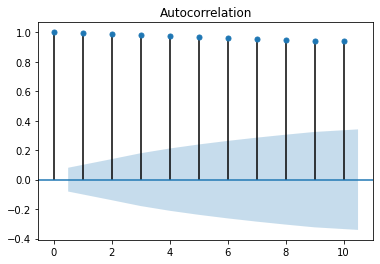

In [181]:
# ACF Test of differenced data
plot_acf(google['Close'].dropna(), lags=10)
plt.show()


As more than 5% of the plot is outside the shaded region, the data is non stationary

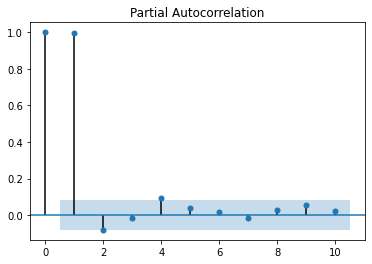

In [182]:
# PACF Test of differenced data
plot_pacf(google['Close'].dropna(), lags=10)
plt.show()

As more than 5% of the plot is outside the shaded region, the data is non stationary

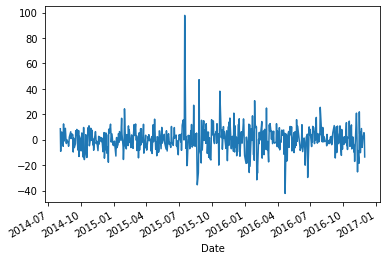

In [183]:
#Differencing to make data as stationary

#Differencing the data
google['diff'] = google['Close'].diff(periods=1)

#Visulaizing the differenced data
google["diff"].plot()


In [184]:
# ADF Test of differenced data
adf_test('diff')


Results of Dickey-Fuller Test for  diff 

Test Statistic                -1.479016e+01
p-value                        2.177423e-27
#Lags Used                     2.000000e+00
Number of Observations Used    5.850000e+02
Critical Value (1%)           -3.441578e+00
Critical Value (5%)           -2.866493e+00
Critical Value (10%)          -2.569408e+00
dtype: float64


In [185]:
# KPSS Test of differenced data
kpss_test('diff')


Results of KPSS Test for  diff
Test Statistic            0.073196
p-value                   0.100000
Lags Used                19.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


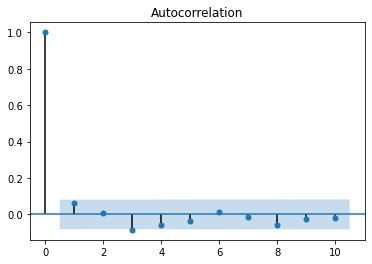

In [186]:
# ACF Test of differenced data
plot_acf(google['diff'].dropna(), lags=10)
plt.show()


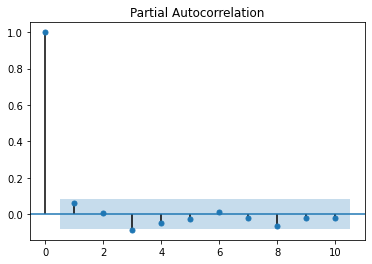

In [187]:
# PACF Test of differenced data
plot_pacf(google['diff'].dropna(), lags=10)
plt.show()

Now the given time series become stationary after differencing

**Outliers**

In [188]:
google.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
diff         1
dtype: int64

In [189]:
google.describe()

,High,Low,Open,Close,Volume,Adj Close,diff
count,589.000000,589.000000,589.000000,589.000000,5.890000e+02,589.000000,588.000000
mean,670.241070,658.717657,664.847572,664.520458,2.059138e+06,664.520458,0.344014
std,101.589772,100.188867,100.998646,100.889144,1.074884e+06,100.889144,9.973392
min,500.279999,490.910004,499.239990,497.059998,5.206000e+05,497.059998,-42.229980
25%,561.109985,552.260010,558.000000,556.809998,1.447600e+06,556.809998,-4.627548
50%,692.260010,673.679993,683.729980,681.140015,1.769100e+06,681.140015,0.409973
75%,763.229980,751.570007,757.520020,757.650024,2.345900e+06,757.650024,5.309998
max,839.000000,829.039978,838.500000,835.739990,1.285810e+07,835.739990,97.839966


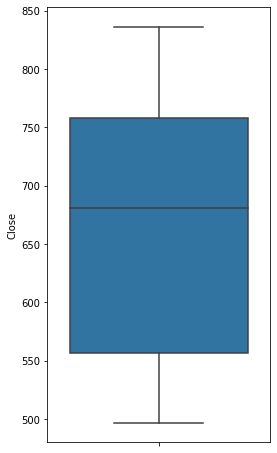

In [190]:
import seaborn as sns 
plt.figure(figsize = (4,8))
sns.boxplot(y = google.Close)

**Interquartile Range (IQR) method for detecting outliers**

In [191]:
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [192]:
import numpy as np
out_iqr(google,'Close')
#Input the dataset and the required column

The IQR is 200.84002685546875
The lower bound value is 255.54995727539062
The upper bound value is 1058.9100646972656
Total number of outliers are 0


As per the IQR method, there are 0 outliers.

**Standard Deviation Method for detecting outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


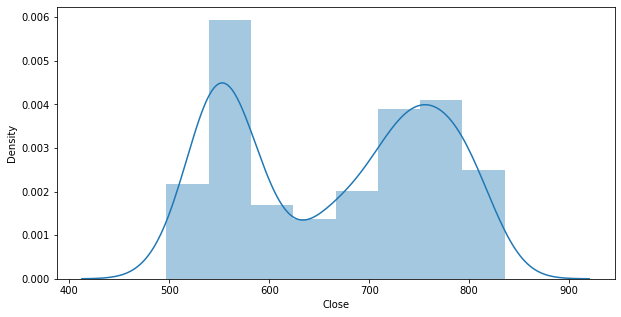

In [193]:
plt.figure(figsize = (10,5))
sns.distplot(google['Close'])

In [194]:
def out_std(df, column):
    global lower,upper
    # calculate the mean and standard deviation of the data frame
    data_mean, data_std = df[column].mean(), df[column].std()
    # calculate the cutoff value
    cut_off = data_std * 3
    # calculate the lower and upper bound value
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [195]:
out_std(google,'Close')

The lower bound value is 361.8530267714717
The upper bound value is 967.1878892698522
Total number of outliers are 0


As per the standard deviation method, there are 0 outliers.

Visual representation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


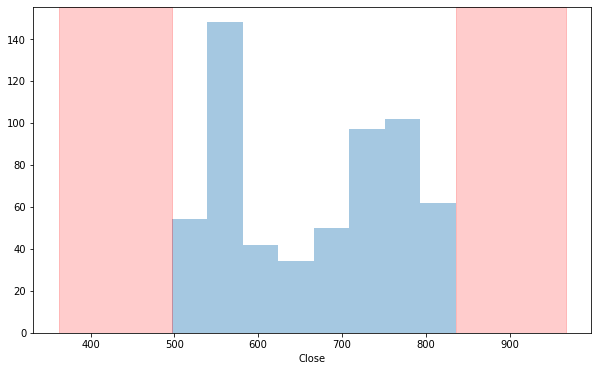

In [196]:
plt.figure(figsize = (10,6))
sns.distplot(google.Close, kde=False)
plt.axvspan(xmin = lower,xmax= google.Close.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= google.Close.max(),alpha=0.2, color='red')

Remedial Measure

In [197]:
#Data Frame without outliers
df_new = google[(google['Close'] < upper) | (google['Close'] > lower)]
df_new

,High,Low,Open,Close,Volume,Adj Close,diff
Date,,,,,,,
2014-08-01,583.429993,570.299988,578.549988,573.599976,2213300,573.599976,NaN
2014-08-04,583.820007,572.260010,576.510010,582.270020,1519400,582.270020,8.670044
2014-08-05,580.200012,570.309998,579.380005,573.140015,1643800,573.140015,-9.130005
2014-08-06,578.640015,567.450012,569.500000,574.489990,1322800,574.489990,1.349976
2014-08-07,578.309998,569.429993,576.049988,571.809998,1163000,571.809998,-2.679993
...,...,...,...,...,...,...,...
2016-11-23,789.520020,772.650024,789.520020,779.000000,1313000,779.000000,-6.000000
2016-11-25,782.900024,778.190002,782.609985,780.229980,613500,780.229980,1.229980
2016-11-28,799.739990,778.099976,778.349976,785.789978,2575400,785.789978,5.559998


#Exploratory data analysis for IBM dataset

In [198]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller,kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


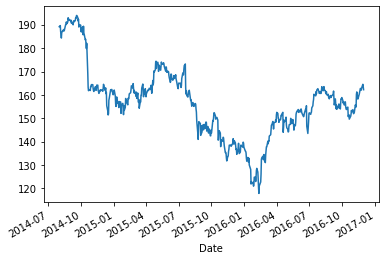

In [199]:
#Visulaizing the close data
import matplotlib.pyplot as plt
ibm["Close"].plot()

In [200]:
#ADF Test

def adf_test(atr):
  
    #Perform Dickey-Fuller test:
    timeseries = ibm[atr].dropna()
    print ('Results of Dickey-Fuller Test for ',atr,'\n')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

#apply adf test on the series
adf_test('Close')

Results of Dickey-Fuller Test for  Close 

Test Statistic                  -2.279273
p-value                          0.178740
#Lags Used                       0.000000
Number of Observations Used    588.000000
Critical Value (1%)             -3.441520
Critical Value (5%)             -2.866468
Critical Value (10%)            -2.569394
dtype: float64


The p value obtained is greater than significance level of 0.05 and test statistic is higher than any of the critical values 

so we cant reject the null hypothesis so the time series is non stationary.

In [201]:
#KPSS Test

def kpss_test(atr):
    timeseries = ibm[atr].dropna()
    print ('Results of KPSS Test for ',atr)
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
    
kpss_test('Close')

Results of KPSS Test for  Close
Test Statistic            1.268862
p-value                   0.010000
Lags Used                19.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


The p value is significant less than 0.05 hence we can reject the null hypothesis so series is non stationary

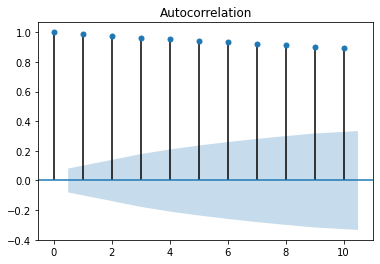

In [202]:
# ACF Test of differenced data
plot_acf(ibm['Close'].dropna(), lags=10)
plt.show()


As more than 5% of the plot is outside the shaded region, the data is non stationary

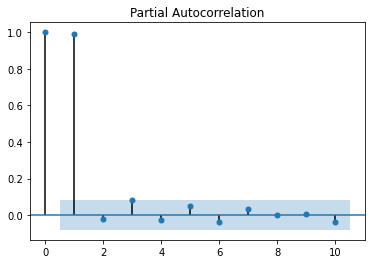

In [203]:
# PACF Test of differenced data
plot_pacf(ibm['Close'].dropna(), lags=10)
plt.show()

As more than 5% of the plot is outside the shaded region, the data is non stationary

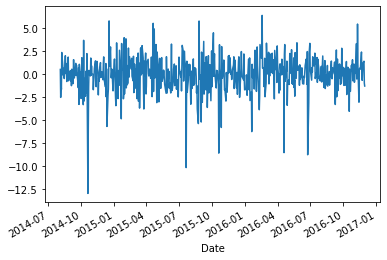

In [204]:
#Differencing to make data as stationary

#Differencing the data
ibm['diff'] = ibm['Close'].diff(periods=1)

#Visulaizing the differenced data
ibm["diff"].plot()


In [205]:
# ADF Test of differenced data
adf_test('diff')


Results of Dickey-Fuller Test for  diff 

Test Statistic                -1.843371e+01
p-value                        2.166547e-30
#Lags Used                     1.000000e+00
Number of Observations Used    5.860000e+02
Critical Value (1%)           -3.441558e+00
Critical Value (5%)           -2.866485e+00
Critical Value (10%)          -2.569403e+00
dtype: float64


In [206]:
# KPSS Test of differenced data
kpss_test('diff')


Results of KPSS Test for  diff
Test Statistic            0.251866
p-value                   0.100000
Lags Used                19.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


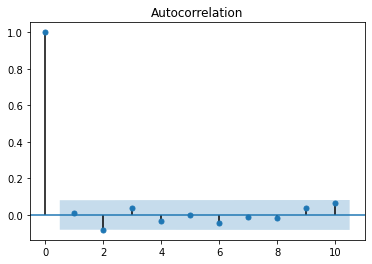

In [207]:
# ACF Test of differenced data
plot_acf(ibm['diff'].dropna(), lags=10)
plt.show()


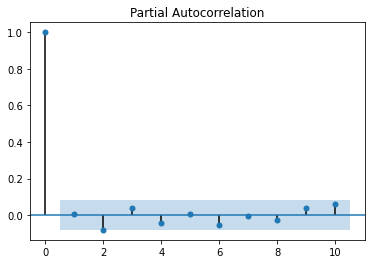

In [208]:
# PACF Test of differenced data
plot_pacf(ibm['diff'].dropna(), lags=10)
plt.show()

Now the given time series become stationary after differencing

**Outliers**

In [209]:
ibm.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
diff         1
dtype: int64

In [210]:
ibm.describe()

,High,Low,Open,Close,Volume,Adj Close,diff
count,589.000000,589.000000,589.000000,589.000000,5.890000e+02,589.000000,588.000000
mean,157.737182,155.463786,156.583566,156.617402,4.244832e+06,123.461819,-0.045799
std,15.227783,15.364561,15.325756,15.263828,2.246524e+06,10.790073,1.977649
min,119.660004,116.900002,118.459999,117.849998,1.415800e+06,94.504570,-12.949997
25%,148.649994,146.449997,147.610001,147.889999,2.962400e+06,117.349693,-1.089996
50%,158.369995,155.679993,157.070007,156.949997,3.725400e+06,124.090508,0.044994
75%,164.000000,161.830002,162.770004,162.880005,4.701400e+06,129.907471,1.070007
max,195.000000,193.190002,194.539993,194.000000,2.341650e+07,148.113205,6.349998


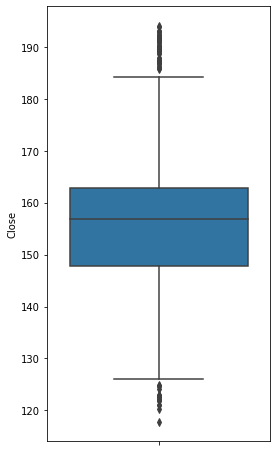

In [211]:
import seaborn as sns 
plt.figure(figsize = (4,8))
sns.boxplot(y = ibm.Close)

**Interquartile Range (IQR) method for detecting outliers**

In [212]:
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [213]:
import numpy as np
out_iqr(ibm,'Close')
#Input the dataset and the required column

The IQR is 14.990005493164062
The lower bound value is 125.40499114990234
The upper bound value is 185.3650131225586
Total number of outliers are 65


As per the IQR method, there are 65 outliers.

**Standard Deviation Method for detecting outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


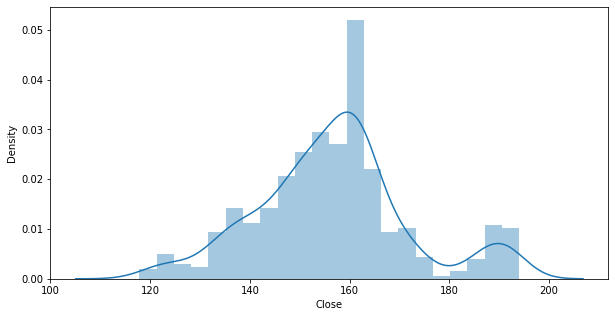

In [214]:
plt.figure(figsize = (10,5))
sns.distplot(ibm['Close'])

In [215]:
def out_std(df, column):
    global lower,upper
    # calculate the mean and standard deviation of the data frame
    data_mean, data_std = df[column].mean(), df[column].std()
    # calculate the cutoff value
    cut_off = data_std * 3
    # calculate the lower and upper bound value
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [216]:
out_std(ibm,'Close')

The lower bound value is 110.82591927072701
The upper bound value is 202.40888538464924
Total number of outliers are 0


As per the standard deviation method, there are 0 outliers.

Visual representation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


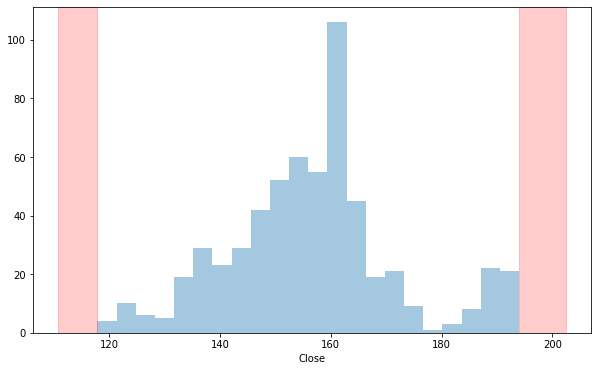

In [217]:
plt.figure(figsize = (10,6))
sns.distplot(ibm.Close, kde=False)
plt.axvspan(xmin = lower,xmax= ibm.Close.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= ibm.Close.max(),alpha=0.2, color='red')

Remedial Measure

In [218]:
#Data Frame without outliers
df_new = ibm[(ibm['Close'] < upper) | (ibm['Close'] > lower)]
df_new

,High,Low,Open,Close,Volume,Adj Close,diff
Date,,,,,,,
2014-08-01,191.500000,188.860001,190.500000,189.149994,5181100.0,143.561371,NaN
2014-08-04,189.949997,188.600006,189.350006,189.639999,2125900.0,143.933304,0.490005
2014-08-05,189.199997,186.440002,188.750000,187.100006,3307900.0,142.005493,-2.539993
2014-08-06,186.880005,184.440002,185.360001,185.970001,3847000.0,141.982544,-1.130005
2014-08-07,186.679993,183.580002,186.639999,184.300003,2708600.0,140.707535,-1.669998
...,...,...,...,...,...,...,...
2016-11-23,162.380005,161.360001,161.940002,161.979996,2252700.0,133.478912,-0.690002
2016-11-25,163.190002,161.830002,161.830002,163.139999,1605300.0,134.434784,1.160004
2016-11-28,164.660004,162.699997,163.199997,164.520004,4449400.0,135.571976,1.380005
